<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Clothes%20image%20classification/Evaluation/K_Means_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evaluation

Al igual que se realizó en la sección de modelamiento, es necesario distinguir las métricas de evaluación a usar para determinar el rendimiento de los modelos entrenados en la sección anterior.

### Unsupervised K-Means.

Por un lado, en la sección anterior ya se estudió un primer método para evaluar el funcionamiento del modelo de K-Means con el método del codo, el cual permite ver gráficamente cuál es el número adecuado de clusters para determinado conjunto de datos. Aún así, existen otras métricas más cuantitativas para evaluar este tipo de modelos de clusters, como lo es el coeficiente de silueta que varía de -1 a 1 y que debe maximizarse para tener los mejores resultados; así que en primer lugar, se evalúa este coeficiente para diferente número de clusters con el conjunto de datos original:

Para k_clusters = 2 el promedio del silhouette_score es : 0.19345453
Para k_clusters = 3 el promedio del silhouette_score es : 0.19066642
Para k_clusters = 4 el promedio del silhouette_score es : 0.18271221
Para k_clusters = 5 el promedio del silhouette_score es : 0.16578624
Para k_clusters = 6 el promedio del silhouette_score es : 0.15937434
Para k_clusters = 7 el promedio del silhouette_score es : 0.16711956
Para k_clusters = 8 el promedio del silhouette_score es : 0.15766159
Para k_clusters = 9 el promedio del silhouette_score es : 0.15582822
Para k_clusters = 10 el promedio del silhouette_score es : 0.15424512


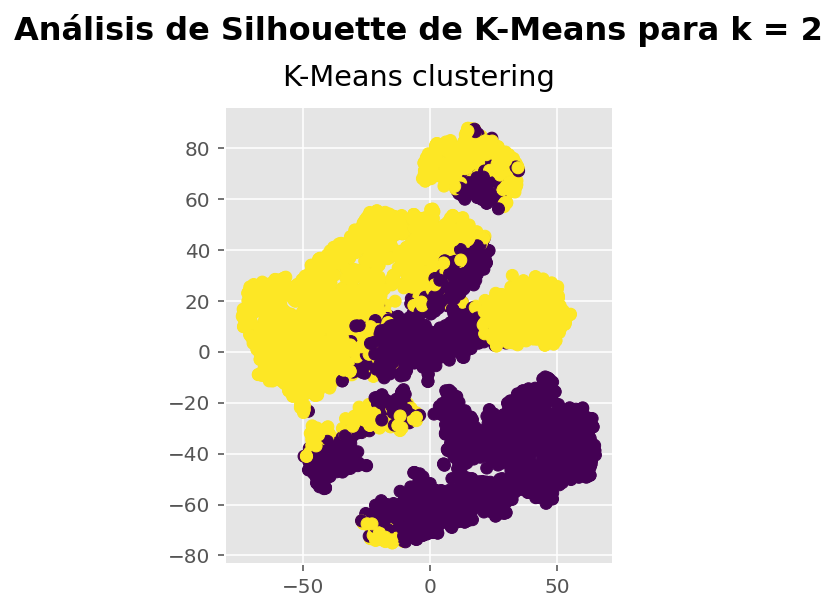

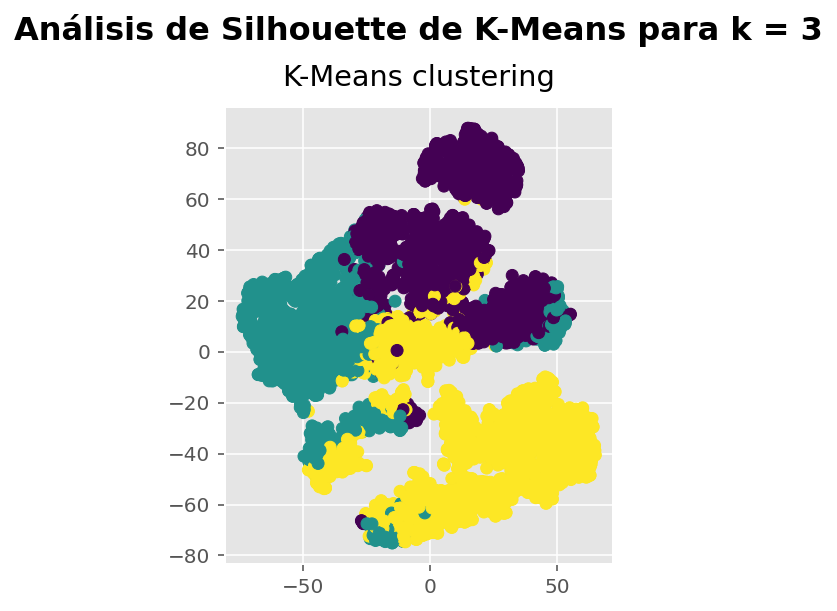

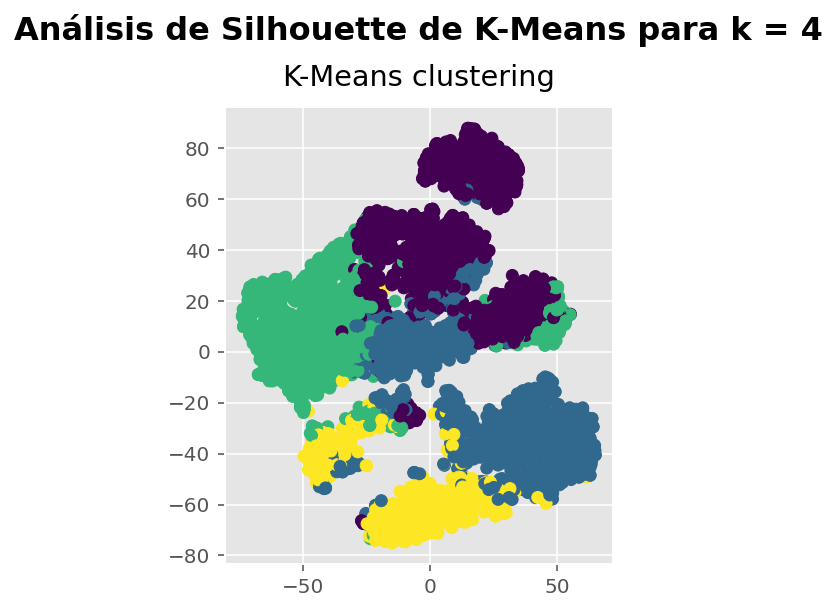

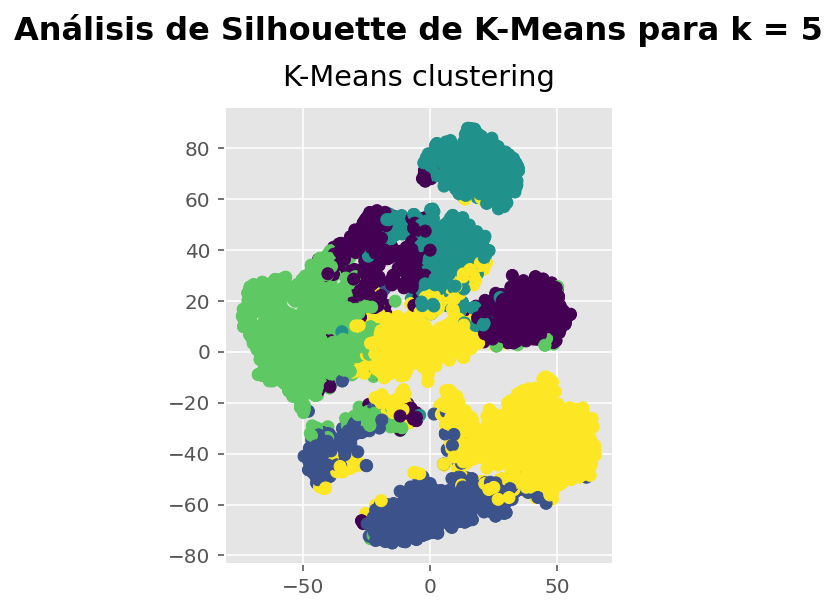

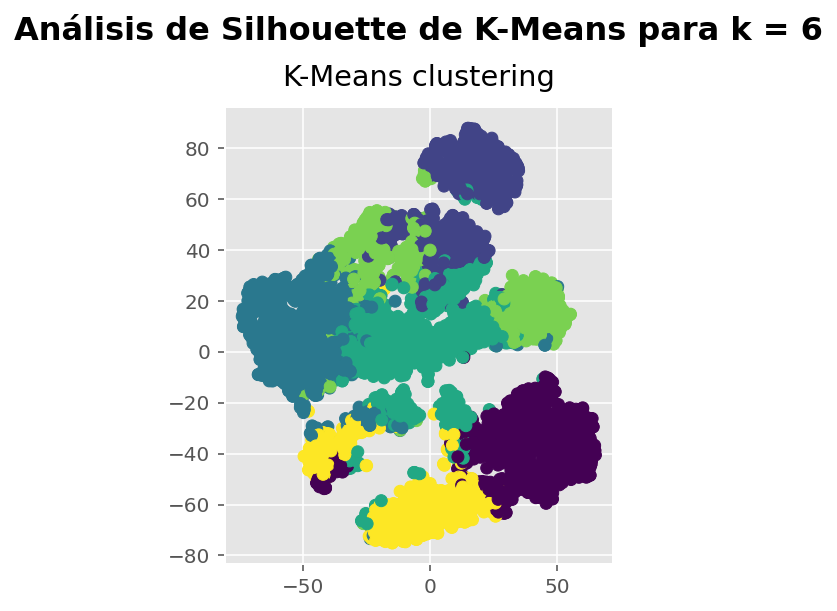

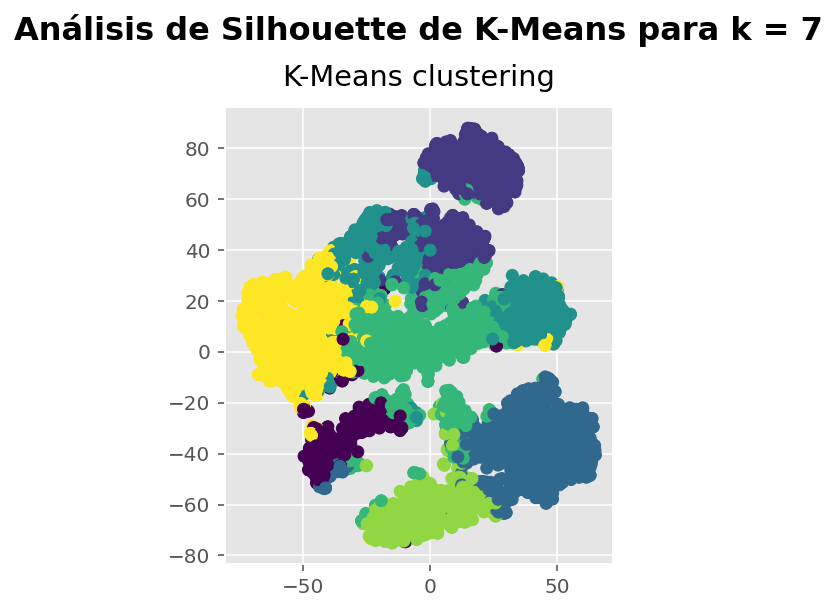

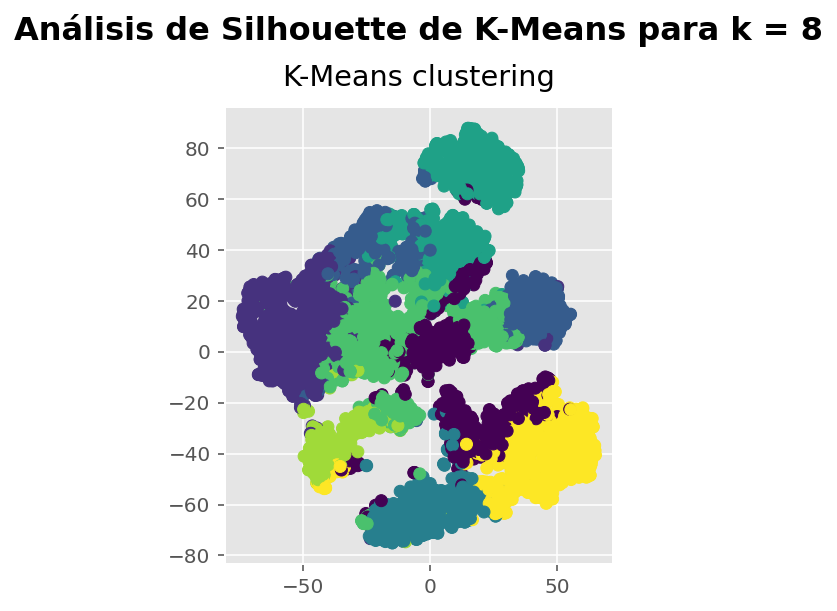

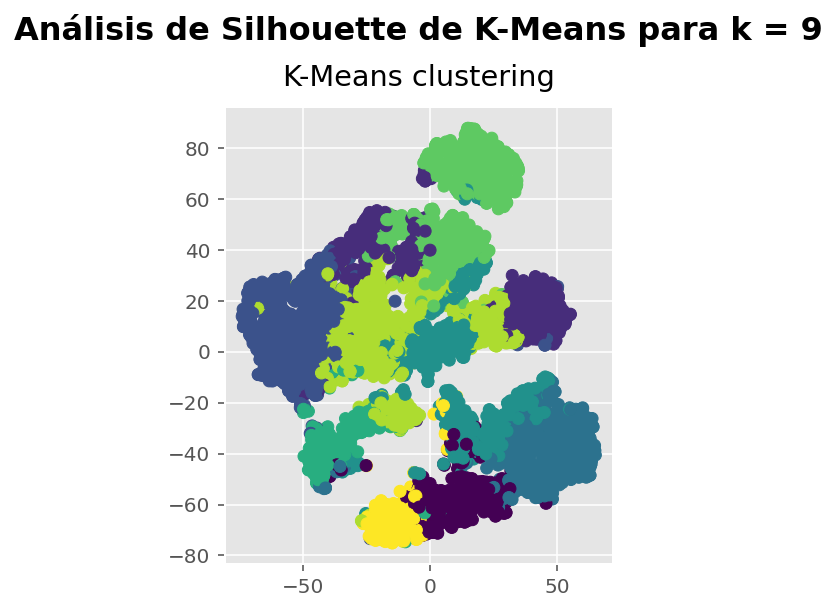

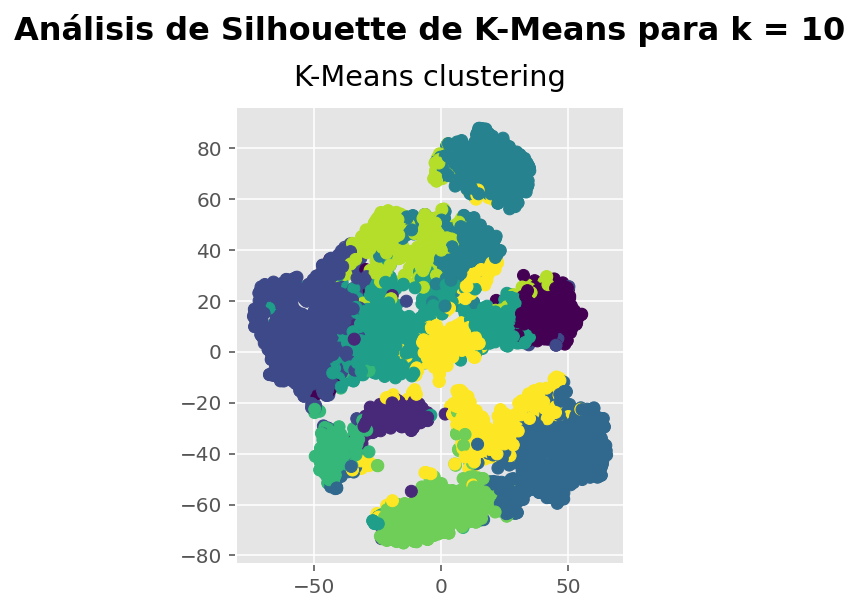

In [ ]:
for i, k in enumerate(range(2, 11)):
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    
    # K-Means para un número de clusters k
    km = sklearn.cluster.KMeans(n_clusters=k, random_state = 333)
    labelss = km.fit_predict(x)
    centroids = km.cluster_centers_

    # Silhouette samples sobre el conjunto de datos
    silhouette_vals = silhouette_samples(x, labelss)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labelss)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        y_lower += len(cluster_silhouette_vals)
        
    avg_score = np.mean(silhouette_vals)
    
    # Scatter para las representaciones con los colores de cada label
    ax.scatter(T[:, 0], T[:, 1], c=labelss)
    ax.set_title('K-Means clustering', y=1.02)
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Análisis de Silhouette de K-Means para k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    
    # Silhouette score para cada número de clusters
    print(
        "Para k_clusters =",
        k,
        "el promedio del silhouette_score es :",
        avg_score,
    )

Los resultados de este coeficiente indican que el número más adecuado de clusters para agrupar las imágenes es de 2, lo cual se aleja bastante del número total de etiquetas (10) que hay para las prendas estudiadas. Sin embargo, todos los coeficientes obtenidos son bastante bajos y esto también podría indicar que un modelo de clustering como el realizado no era el más pertinente para el análisis del conjunto de datos usado.

Veamos ahora los resultados de esta métrica sobre el clustering hecho sobre el conjunto de datos de menor dimensión:

Para k_clusters = 2 el promedio del silhouette_score es : 0.21468796
Para k_clusters = 3 el promedio del silhouette_score es : 0.21664846
Para k_clusters = 4 el promedio del silhouette_score es : 0.20798157
Para k_clusters = 5 el promedio del silhouette_score es : 0.19334333
Para k_clusters = 6 el promedio del silhouette_score es : 0.18838768
Para k_clusters = 7 el promedio del silhouette_score es : 0.19803584
Para k_clusters = 8 el promedio del silhouette_score es : 0.18689589
Para k_clusters = 9 el promedio del silhouette_score es : 0.19067499
Para k_clusters = 10 el promedio del silhouette_score es : 0.18555643


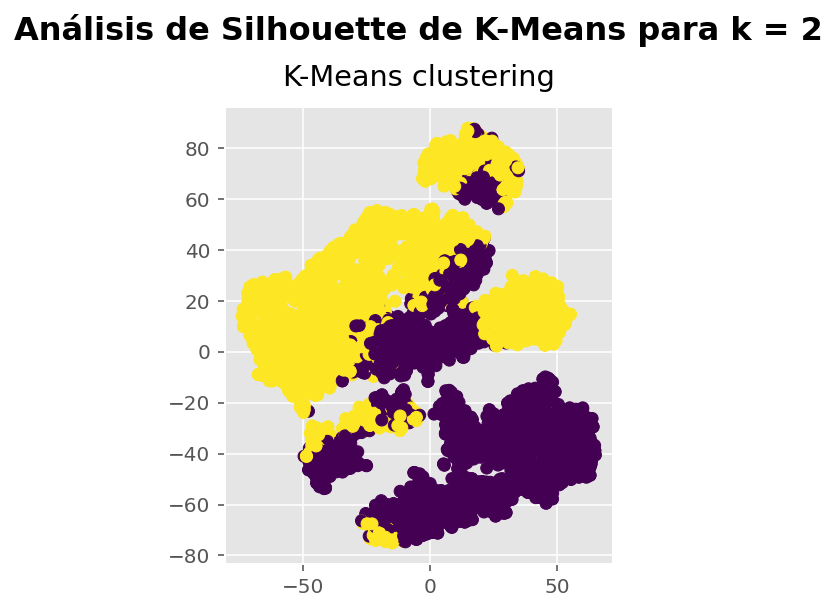

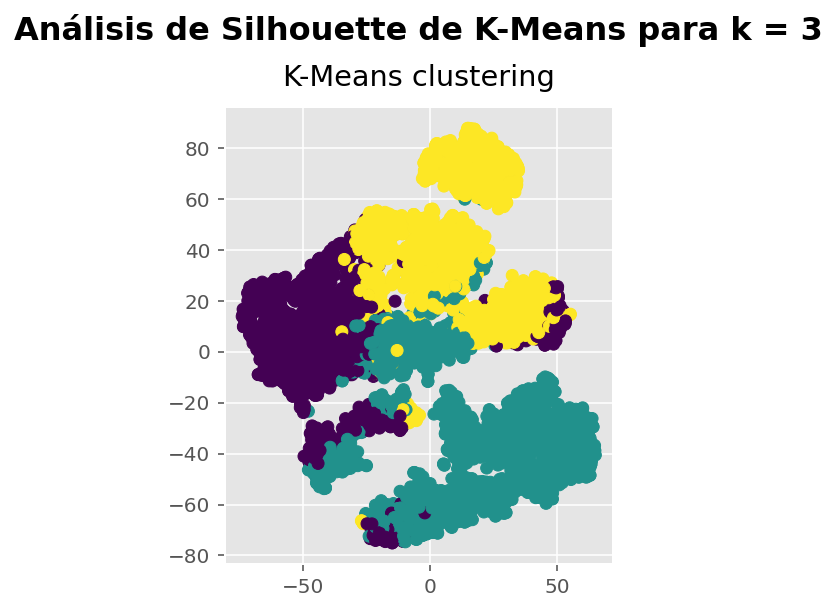

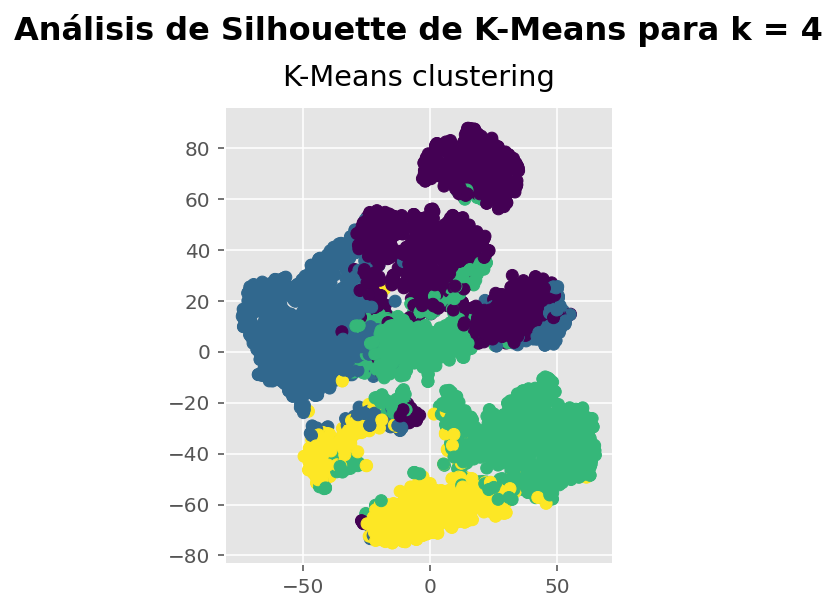

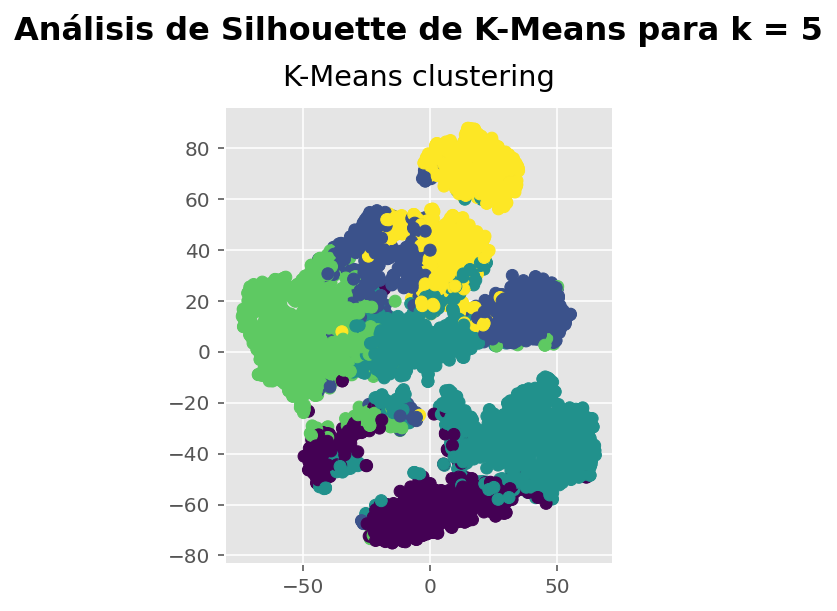

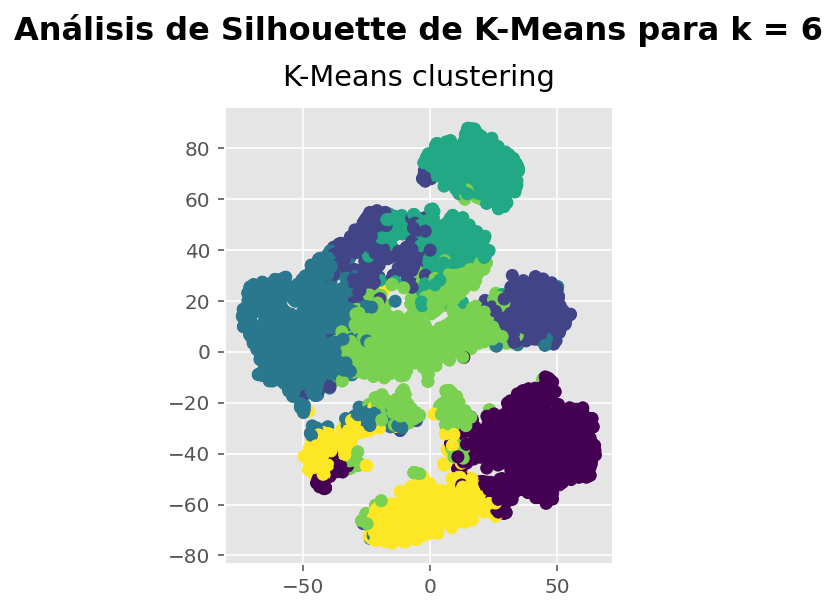

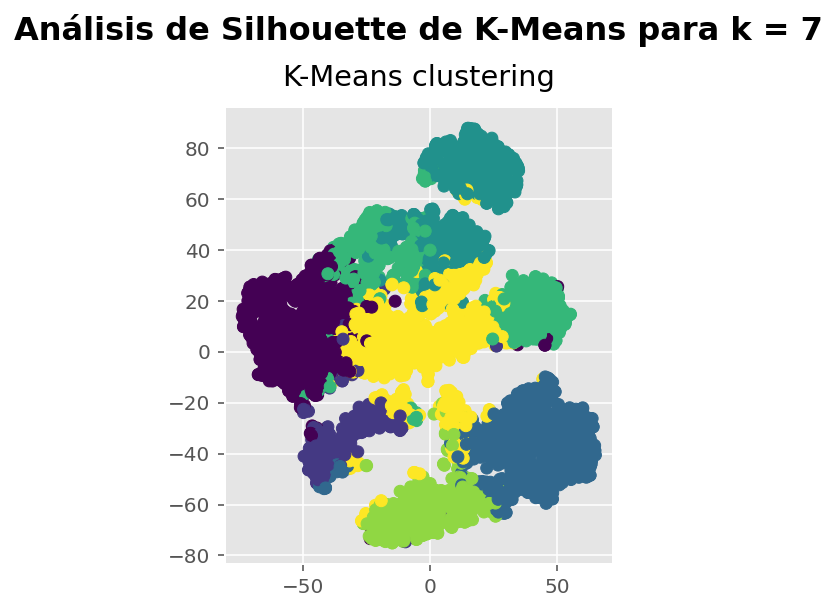

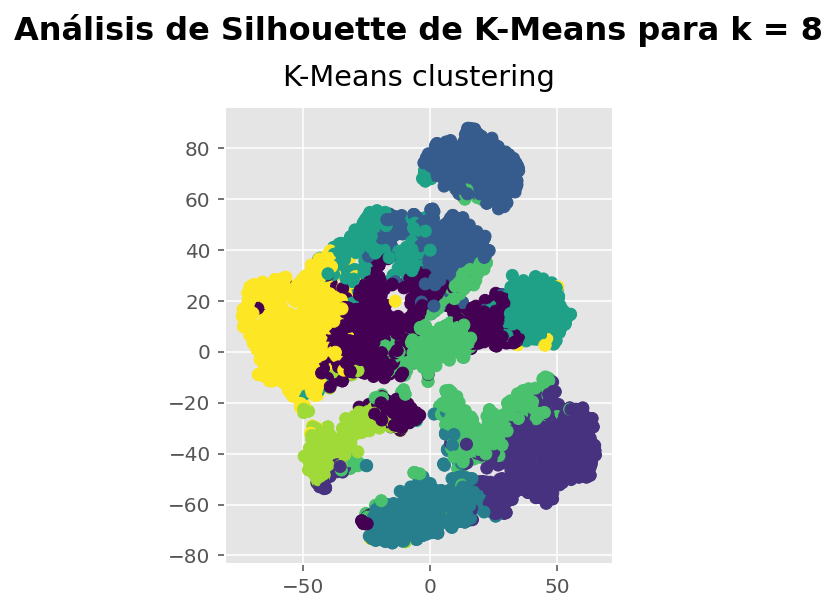

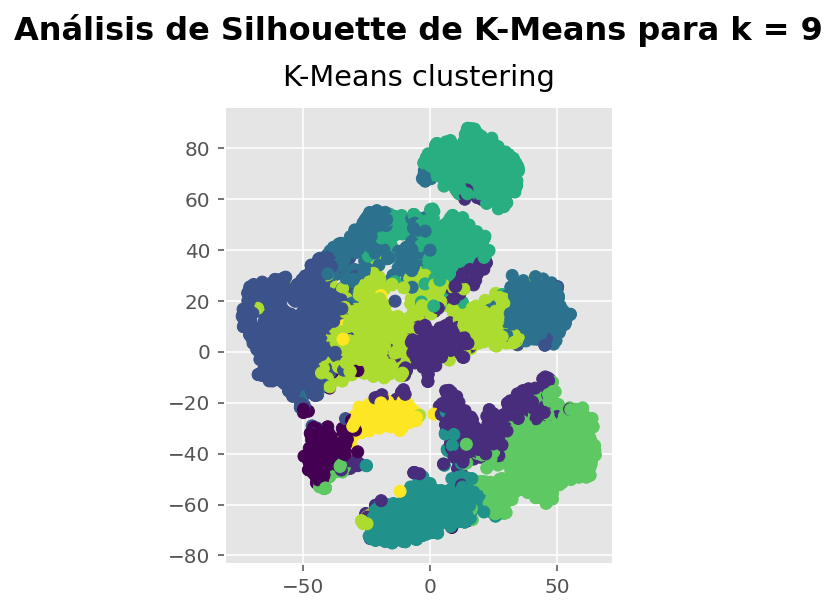

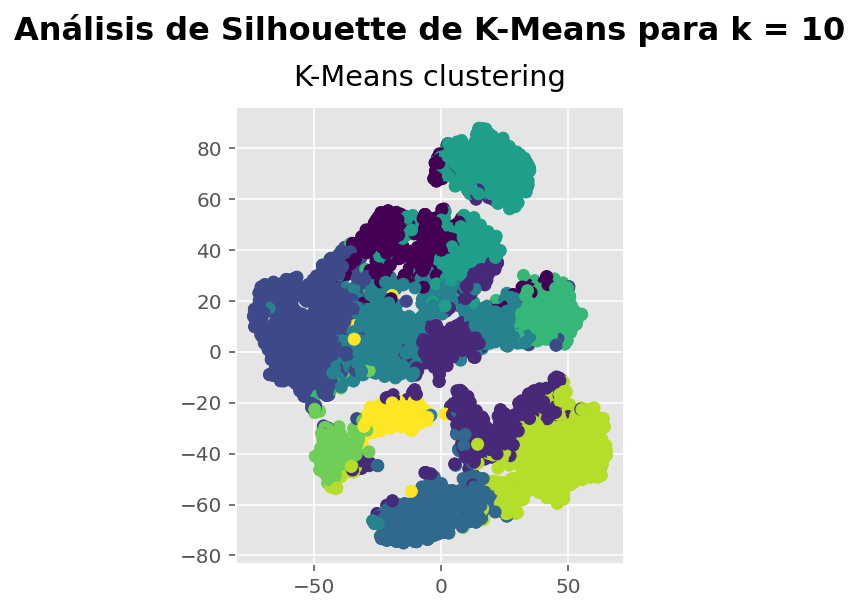

In [ ]:
for i, k in enumerate(range(2, 11)):
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    
    # K-Means para un número de clusters k
    km = sklearn.cluster.KMeans(n_clusters=k, random_state = 333)
    labelss = km.fit_predict(pca_data)
    centroids = km.cluster_centers_

    # Silhouette samples sobre el conjunto de datos
    silhouette_vals = silhouette_samples(pca_data, labelss)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labelss)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        y_lower += len(cluster_silhouette_vals)
        
    avg_score = np.mean(silhouette_vals)
    
    # Scatter para las representaciones con los colores de cada label
    ax.scatter(T[:, 0], T[:, 1], c=labelss)
    ax.set_title('K-Means clustering', y=1.02)
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Análisis de Silhouette de K-Means para k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    
    # Silhouette score para cada número de clusters
    print(
        "Para k_clusters =",
        k,
        "el promedio del silhouette_score es :",
        avg_score,
    )

A pesar de que los coeficientes de silueta obtenidos con este conjunto de datos mejoran levemente a comparación del conjunto de datos original, las conclusiones son las mismas que dicho caso mencionado, debido a que los mayores valores obtenidos para este coeficiente están sobre $0.21$ para 2 y 3 clusters, lo cual aún se aleja considerablemente de 1, el valor ideal.

Por otro lado, teniendo en cuenta que se dispone con las etiquetas reales de las imágenes, una de las métricas adecuadas para usar sobre el modelo es el índice ajustado de Rand, la cual retorna valores entre 0 y 1 y que también debe maximizarse, así que al aplicarla sobre ambos conjuntos de datos se tiene:

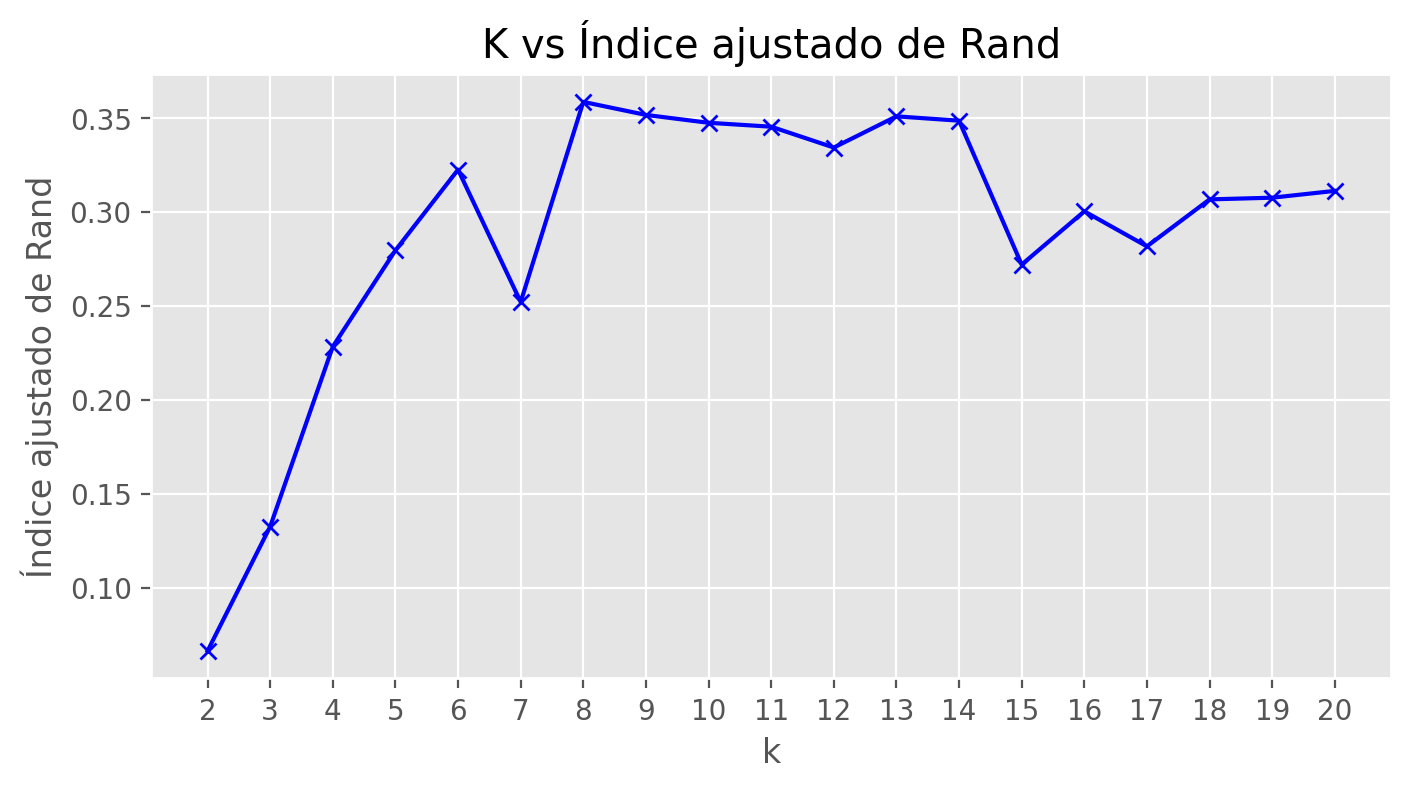

In [ ]:
rand = []
for i in range(2, 21):
    model = MiniBatchKMeans(n_clusters = i, random_state = 333)
    labelss = model.fit_predict(x)
    rand.append(adjusted_rand_score(y, labelss))
        
plt.figure(dpi=100, figsize=(8, 4))
plt.plot(range(2, 21), rand, 'bx-')
plt.xticks(range(2, 21))
plt.xlabel('k');
plt.ylabel('Índice ajustado de Rand');
plt.title(f'K vs Índice ajustado de Rand');

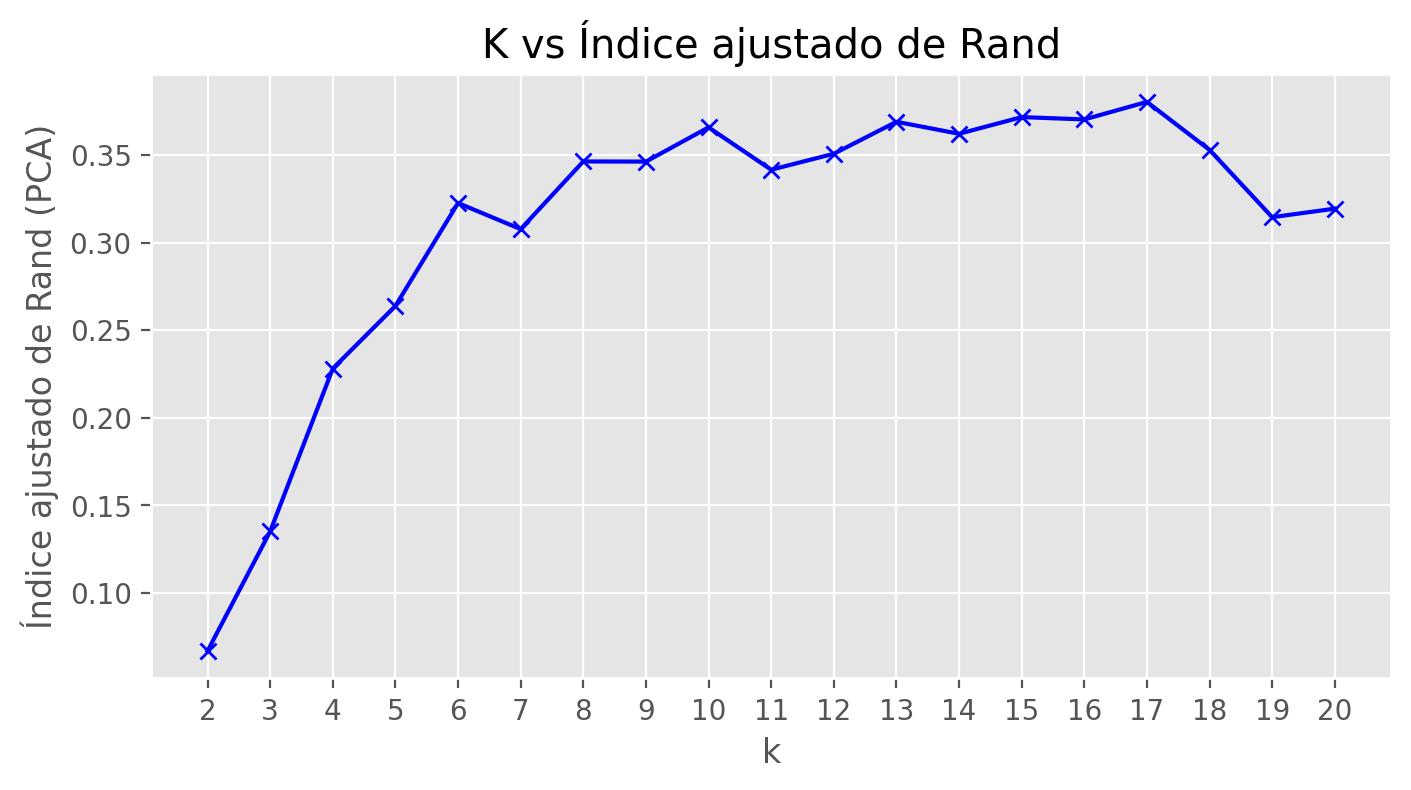

In [ ]:
rand = []
for i in range(2, 21):
    model = MiniBatchKMeans(n_clusters = i, random_state = 333)
    labelss = model.fit_predict(pca_data)
    rand.append(adjusted_rand_score(y, labelss))
        
plt.figure(dpi=100, figsize=(8, 4))
plt.plot(range(2, 21), rand, 'bx-')
plt.xticks(range(2, 21))
plt.xlabel('k');
plt.ylabel('Índice ajustado de Rand (PCA)');
plt.title(f'K vs Índice ajustado de Rand');

El comportamiento del índice en función del número de clusters es bastante similar para los dos conjuntos de datos, con un posible mejor rendimiento para los datos con PCA para $k=17$, mientras que el valor más alto para los datos originales está en $k=8$. A diferencia de los resultados con el coeficiente de silueta, estos mejoran al ser comparados con las etiquetas reales, aunque otro tipo de modelos podrían resultar mucho mejores para realizar predicciones sobre este conjunto de imágenes.